In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [45]:
home_dir = '.' # change to yours
alpha = 40
rank = 200
regParam = 1
maxIter = 20
output_dir = f'{home_dir}/time_outputs'
num_users = 5
ks = np.concatenate([[1],np.arange(50,550,50)])

In [52]:
out_file_annoy = [f'{output_dir}/annoy_MFImp_a{alpha}r{rank}_reg{regParam}_it{maxIter}_k{k}.json' for k in ks]
out_file_bruteforce = [f'{output_dir}/bruteforce_MFImp_a{alpha}r{rank}_reg{regParam}_it{maxIter}_k{k}.json' for k in ks]

In [24]:
with open(out_file[0]) as f:
    out = json.load(f)
    f.close()

dict_keys(['average', 'timings', 'best', 'loops', 'worst'])

In [77]:
annoy_timings = dict()
for file in out_file_annoy:
    with open(file) as f:
        out = json.load(f)
        f.close()
    annoy_timings[int(file.split('.')[-2].split('k')[1])] = out['timings']
bruteforce_timings = dict()
for file in out_file_bruteforce:
    with open(file) as f:
        out = json.load(f)
        f.close()
    bruteforce_timings[int(file.split('.')[-2].split('k')[1])] = out['timings']

In [78]:
annoy_means = {k : np.mean(annoy_timings[k]) for k in list(annoy_timings.keys())}
annoy_stddev = {k : np.std(annoy_timings[k]) for k in list(annoy_timings.keys())}
bruteforce_means = {k : np.mean(bruteforce_timings[k]) for k in list(bruteforce_timings.keys())}
bruteforce_stddev = {k : np.std(bruteforce_timings[k]) for k in list(bruteforce_timings.keys())}

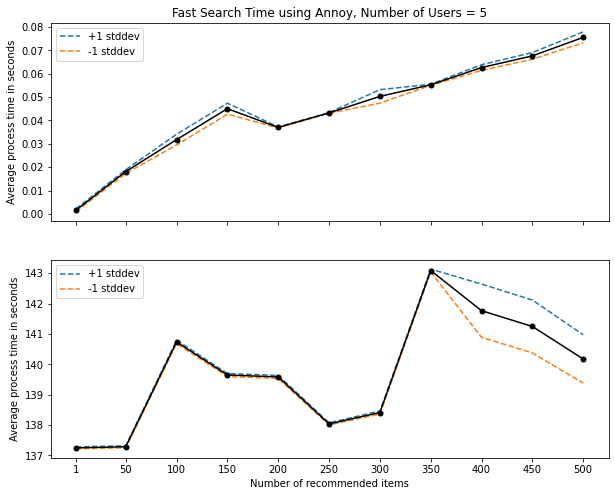

In [96]:
fig,ax = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[0].plot(ks,np.array(list(annoy_means.values()))+np.array(list(annoy_stddev.values())),'--',label='+1 stddev')
ax[0].plot(ks,np.array(list(annoy_means.values()))-np.array(list(annoy_stddev.values())),'--',label='-1 stddev')
ax[0].plot(ks,list(annoy_means.values()),'.-',markersize=10,c = 'k')
ax[0].legend()

ax[1].plot(ks,np.array(list(bruteforce_means.values()))+np.array(list(bruteforce_stddev.values())),'--',label='+1 stddev')
ax[1].plot(ks,np.array(list(bruteforce_means.values()))-np.array(list(bruteforce_stddev.values())),'--',label='-1 stddev')
ax[1].plot(ks,list(bruteforce_means.values()),'.-',markersize=10,c = 'k')

ax[1].legend()
ax[0].set_xticks(ks)
ax[0].set_title(f'Fast Search Time using Annoy, Number of Users = {num_users}')
ax[0].set_ylabel('Average process time in seconds')
ax[1].set_ylabel('Average process time in seconds')
ax[1].set_xlabel('Number of recommended items')

plt.show()